In [1]:
!pip install pandas matplotlib scikit-learn seaborn numpy

In [2]:
import pandas as pd

# Specify the path to the local Excel file
file_path = r"...\properties.csv" # Replace with the actual file path

try:
    # Attempt to read the Excel file into a DataFrame
    df = pd.read_csv(file_path)
    
    # If successful, print a success message
    print('Data downloaded and read into a dataframe!')
except Exception as e:
    # If unsuccessful, print an error message
    print(f'Failed to retrieve data from the Excel file. Error: {e}')


Data downloaded and read into a dataframe!


In [3]:
df.head(15)

,Unnamed: 0,Address,AreaName,Price ($),lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
5,7,"254A Monarch Park Ave Toronto, ON",Old East York,1488000,43.686375,-79.328918
6,8,"532 Caledonia Rd Toronto, ON",Fairbank,25,43.691193,-79.461662
7,9,"11 REBECCA Street Hamilton, ON",Central Hamilton,254900,43.258541,-79.867615
8,10,"617 BRIGADOON Drive Hamilton, ON",Gourley,364900,43.216557,-79.904991
9,12,"51 - 255 MOUNT ALBION Road Hamilton, ON",Red Hill,304900,43.215706,-79.794189


In [4]:
df = df.drop(columns='Unnamed: 0')
df

,Address,AreaName,Price ($),lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...
25346,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [6]:
df.dtypes

Address       object
AreaName      object
Price ($)      int64
lat          float64
lng          float64
dtype: object

In [7]:
df.describe()

,Price ($),lat,lng
count,2.535100e+04,25351.000000,25351.000000
mean,5.645438e+05,37.326614,-85.218379
std,8.475962e+05,82.858347,73.093572
min,0.000000e+00,-999.000000,-999.000000
25%,2.199000e+05,43.401087,-80.308159
50%,3.719000e+05,43.715977,-79.503342
75%,6.199000e+05,44.466711,-79.107326
max,3.250000e+07,53.851017,1.074519


In [8]:
df.isnull().sum()

Address        0
AreaName     483
Price ($)      0
lat            0
lng            0
dtype: int64

In [9]:
df.shape

(25351, 5)

<Figure size 640x480 with 0 Axes>

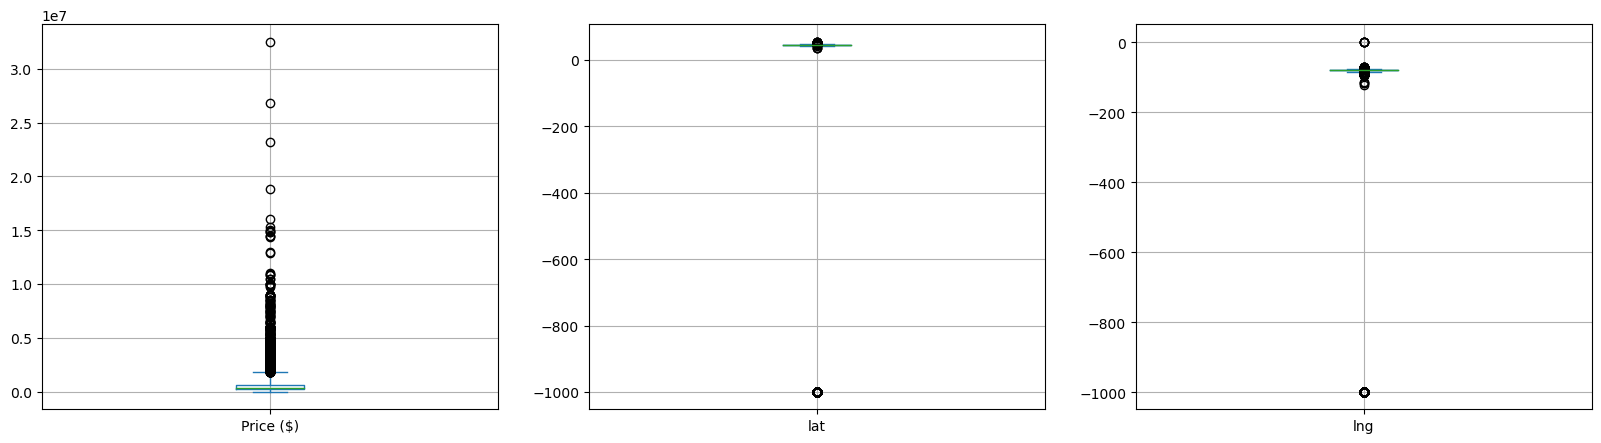

In [10]:
import matplotlib.pyplot as plt
plt.suptitle('Box plots to find outliers')
fig,axes = plt.subplots(1,3,figsize=(20,5))
df[['Price ($)']].plot(kind='box',whis=3, grid=True, ax = axes[0])
df[['lat']].plot(kind='box',whis=3, grid=True, ax = axes[1])
df[['lng']].plot(kind='box',whis=3, grid=True, ax = axes[2])


plt.show()

In [11]:
#summary_stats=df.describe()
#summary_stats

In [12]:
all_outliers = df[(df['lat'] < 41.675105) | (df['lng'] < -95.15625) | (df['lat'] > 56.8500) | (df['lng'] > -74.28125)].index
df = df.drop(all_outliers)

In [13]:
df_null = df[df['AreaName'].isna()]#or isnull()
df_null = df_null.reset_index(drop=True)
print("Entries with null Area Name:")
df_null

Entries with null Area Name:


,Address,AreaName,Price ($),lat,lng
0,"7393 Wellington Rd 51 . Ariss, ON",NaN,699000,43.596718,-80.340660
1,"152 MARR Drive Elora, ON",NaN,399900,43.693314,-80.437492
2,"4 MOSS DRIVE Long Sault, ON",NaN,385000,45.038666,-74.861732
3,"13 STRATFORD BOULEVARD Long Sault, ON",NaN,399000,45.031109,-74.875374
4,"44 FOREST HILL ROAD Long Sault, ON",NaN,790000,45.032341,-74.874435
...,...,...,...,...,...
317,"4th Conc Road Haliburton, ON",NaN,550000,45.046715,-78.508492
318,"3606 CEDAR GROVE ROAD Prescott, ON",NaN,399999,44.743317,-75.517426
319,"7256 Wellington Road 124 Road Guelph, ON",NaN,499900,43.494778,-80.285805
320,"7985 Tait`s Beach Rd Hamilton Township, ON",NaN,599000,44.109016,-78.273743


In [14]:
#df_N_null = df.dropna(subset=['AreaName'])
df_n_null = df[df['AreaName'].notna()]
df_n_null = df_n_null.reset_index(drop=True)
#bayshore_data = df[df['Area Name'] == 'Bayshore']

# Display the DataFrame after dropping null entries
print("DataFrame after dropping null Area Name entries:")
df_n_null

DataFrame after dropping null Area Name entries:


,Address,AreaName,Price ($),lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...
24839,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
24840,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
24841,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
24842,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [15]:
#df_n_null.isnull().sum()

In [16]:
df_n_null.describe()

,Price ($),lat,lng
count,2.484400e+04,24844.000000,24844.000000
mean,5.670465e+05,43.939380,-79.398070
std,8.536038e+05,0.991408,1.974997
min,0.000000e+00,41.814911,-94.489395
25%,2.218750e+05,43.405089,-80.286224
50%,3.749000e+05,43.714592,-79.500141
75%,6.199000e+05,44.434755,-79.120550
max,3.250000e+07,51.019135,-74.415070


In [17]:
print(df_null.shape,df_n_null.shape)

(322, 5) (24844, 5)


In [18]:
# Use factorize to assign a unique number to each 'AreaName'
df_n_null['AreaCode'] = pd.factorize(df_n_null['AreaName'])[0]

# Display the DataFrame with the assigned numbers
df_n_null



,Address,AreaName,Price ($),lat,lng,AreaCode
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266,0
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396,1
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357,2
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403,3
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118,4
...,...,...,...,...,...,...
24839,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793,716
24840,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745,137
24841,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249,325
24842,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040,244


In [19]:
# Find the number of unique elements in the 'Area Name' column
unique_area_code = df_n_null['AreaCode'].nunique()

# Display the number of unique elements
print("Number of unique elements in the 'Area Name' column:", unique_area_code)

Number of unique elements in the 'Area Name' column: 1104


In [20]:
# Assuming 'AreaCode' is the column with assigned numbers and 'AreaName' is the original area names
unique_area_df = df_n_null[['AreaCode', 'AreaName']].drop_duplicates().reset_index(drop=True)

# Display the DataFrame with unique area codes and names
#unique_area_df

In [21]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Extract the features (X) and the target variable (y)
X = df_n_null[['lat','lng']]
y = df_n_null['AreaCode']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


training_set = df_n_null.loc[X_train.index]
testing_set = df_n_null.loc[X_test.index]

print(X_train.shape,X_test.shape)

(19875, 2) (4969, 2)


In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
# Evaluate the model
predictions = model.predict(X_test)


In [23]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (Random Forests): {mae}')

Mean Absolute Error (Random Forests): 32.522520822917166


In [24]:
from sklearn.metrics import r2_score

# Evaluate using R-squared
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: 0.849502160637158


In [25]:
import warnings
warnings.filterwarnings('ignore') 
df_null['AreaCode'] = model.predict(df_null[['lat','lng']]).astype(int)
df_null

,Address,AreaName,Price ($),lat,lng,AreaCode
0,"7393 Wellington Rd 51 . Ariss, ON",NaN,699000,43.596718,-80.340660,436
1,"152 MARR Drive Elora, ON",NaN,399900,43.693314,-80.437492,522
2,"4 MOSS DRIVE Long Sault, ON",NaN,385000,45.038666,-74.861732,414
3,"13 STRATFORD BOULEVARD Long Sault, ON",NaN,399000,45.031109,-74.875374,389
4,"44 FOREST HILL ROAD Long Sault, ON",NaN,790000,45.032341,-74.874435,389
...,...,...,...,...,...,...
317,"4th Conc Road Haliburton, ON",NaN,550000,45.046715,-78.508492,562
318,"3606 CEDAR GROVE ROAD Prescott, ON",NaN,399999,44.743317,-75.517426,657
319,"7256 Wellington Road 124 Road Guelph, ON",NaN,499900,43.494778,-80.285805,476
320,"7985 Tait`s Beach Rd Hamilton Township, ON",NaN,599000,44.109016,-78.273743,731


In [26]:
# Assuming 'unique_area_df' is your DataFrame with 'AreaCode' and 'AreaName' columns
area_code_mapping = unique_area_df.set_index('AreaCode')['AreaName'].to_dict()

# Map 'AreaCode' to 'AreaName'
df_null['AreaName'] = df_null['AreaCode'].map(area_code_mapping)
df_null

,Address,AreaName,Price ($),lat,lng,AreaCode
0,"7393 Wellington Rd 51 . Ariss, ON",Port Sydney,699000,43.596718,-80.340660,436
1,"152 MARR Drive Elora, ON",Stirling,399900,43.693314,-80.437492,522
2,"4 MOSS DRIVE Long Sault, ON",Ridgetown,385000,45.038666,-74.861732,414
3,"13 STRATFORD BOULEVARD Long Sault, ON",Parkwoods - Donalda,399000,45.031109,-74.875374,389
4,"44 FOREST HILL ROAD Long Sault, ON",Parkwoods - Donalda,790000,45.032341,-74.874435,389
...,...,...,...,...,...,...
317,"4th Conc Road Haliburton, ON",Chesterville,550000,45.046715,-78.508492,562
318,"3606 CEDAR GROVE ROAD Prescott, ON",Hidden Valley,399999,44.743317,-75.517426,657
319,"7256 Wellington Road 124 Road Guelph, ON",Bradford West Gwillimbury,499900,43.494778,-80.285805,476
320,"7985 Tait`s Beach Rd Hamilton Township, ON",Sarsfield,599000,44.109016,-78.273743,731


In [27]:
# Combine two forms
data_f = pd.concat([df_null, df_n_null])
# Reset the index
data_f = data_f.reset_index(drop=True)
data_f

,Address,AreaName,Price ($),lat,lng,AreaCode
0,"7393 Wellington Rd 51 . Ariss, ON",Port Sydney,699000,43.596718,-80.340660,436
1,"152 MARR Drive Elora, ON",Stirling,399900,43.693314,-80.437492,522
2,"4 MOSS DRIVE Long Sault, ON",Ridgetown,385000,45.038666,-74.861732,414
3,"13 STRATFORD BOULEVARD Long Sault, ON",Parkwoods - Donalda,399000,45.031109,-74.875374,389
4,"44 FOREST HILL ROAD Long Sault, ON",Parkwoods - Donalda,790000,45.032341,-74.874435,389
...,...,...,...,...,...,...
25161,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793,716
25162,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745,137
25163,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249,325
25164,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040,244


In [28]:
# Find the number of unique elements in the 'Area Name' column
unique_area_count = data_f['AreaName'].nunique()

# Display the number of unique elements
print("Number of unique elements in the 'Area Name' column:", unique_area_count)

Number of unique elements in the 'Area Name' column: 1104


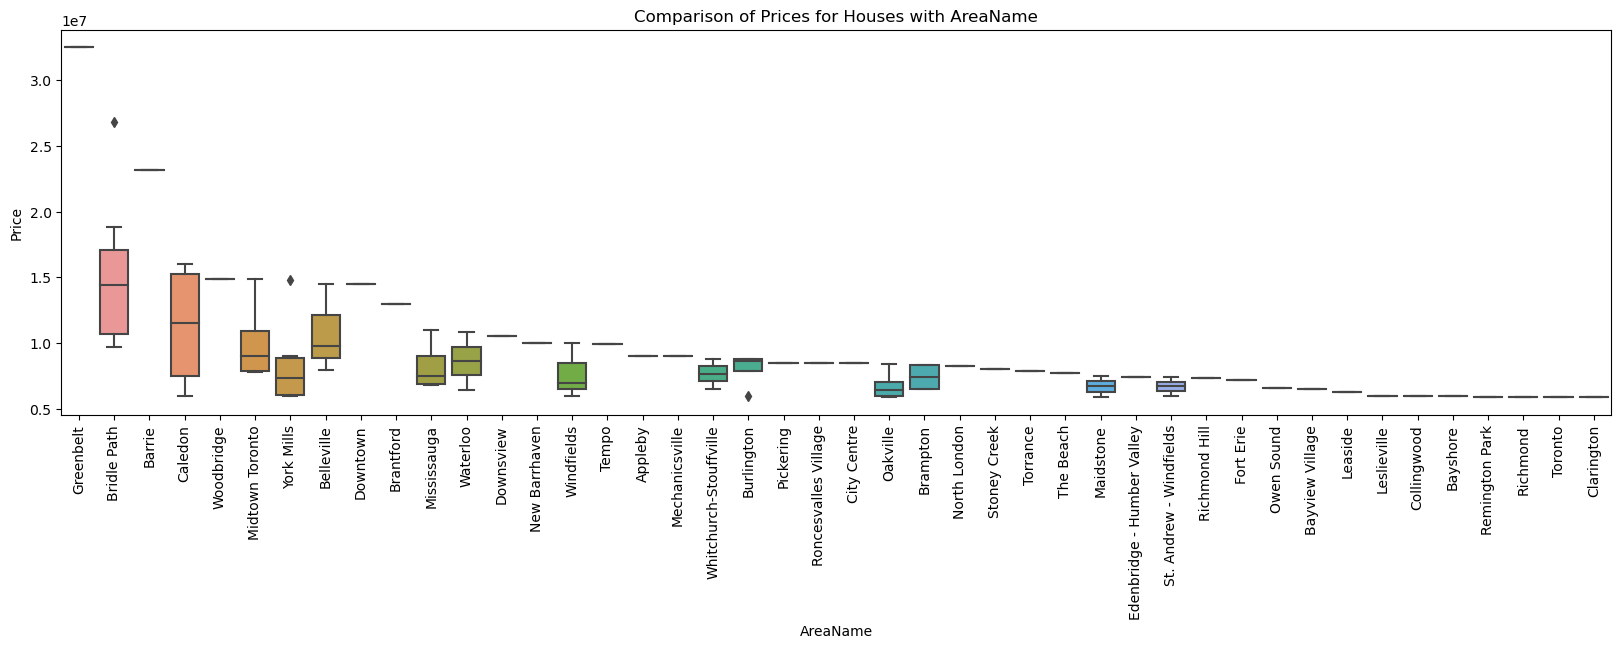

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the plot size
plt.figure(figsize=(20, 5))
# Create a boxplot to compare prices
sns.boxplot(x='AreaName', y='Price ($)', data=data_f.sort_values(by='Price ($)', ascending=False, axis=0).head(100))

plt.xticks(rotation=90)

# Set plot labels and title
plt.xlabel('AreaName')
plt.ylabel('Price')
plt.title('Comparison of Prices for Houses with AreaName')

# Show the plot
plt.show()


In [30]:
data_f.isnull().sum()

Address      0
AreaName     0
Price ($)    0
lat          0
lng          0
AreaCode     0
dtype: int64

In [31]:
!pip install folium

In [ ]:
import folium
from folium.plugins import MarkerCluster, HeatMap
# Create a base map
m = folium.Map(location=[data_f['lat'].mean(), data_f['lng'].mean()], zoom_start=12)

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Plot points on the map
for index, row in data_f.iterrows():
    folium.Marker([row['lat'], row['lng']],
                  popup=f"{row['AreaName']} - ${row['Price ($)']:,}",
                  icon=folium.Icon(color='blue')).add_to(marker_cluster)
# Create a HeatMap layer
heat_data = [[row['lat'], row['lng']] for index, row in data_f.iterrows()]

heatmap_layer = HeatMap(heat_data)

# Add the MarkerCluster and HeatMap layers to the map
marker_cluster.add_to(m)
heatmap_layer.add_to(m)


# Add Layer Control to toggle between MarkerCluster and HeatMap
folium.LayerControl(collapsed=True, control=False).add_to(m)


# Display the map
m